In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv('titanic.csv')

In [3]:
dataset.shape

(891, 12)

# Handling The Missing Values

In [4]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Filling Objectives/Categorical Values

In [6]:
for i in dataset.select_dtypes(include='object').columns:
    dataset[i].fillna(dataset[i].mode()[0], inplace=True)

In [7]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

# Filling The Numerical Values

In [8]:
from sklearn.impute import SimpleImputer

In [9]:
si=SimpleImputer(strategy='mean')
dataset['Age']=si.fit_transform(dataset[['Age']])

In [10]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Encodeing The Male Female Values

In [11]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [12]:
dataset['Sex'].unique()

array(['male', 'female'], dtype=object)

In [13]:
col_to_encode=['Sex']

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [15]:
for column in col_to_encode:
    dataset[column]=le.fit_transform(dataset[column])

In [16]:
dataset['Sex'].unique()

array([1, 0])

In [17]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,B96 B98,S


# Handling The Outliers and Removing The Outliers

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

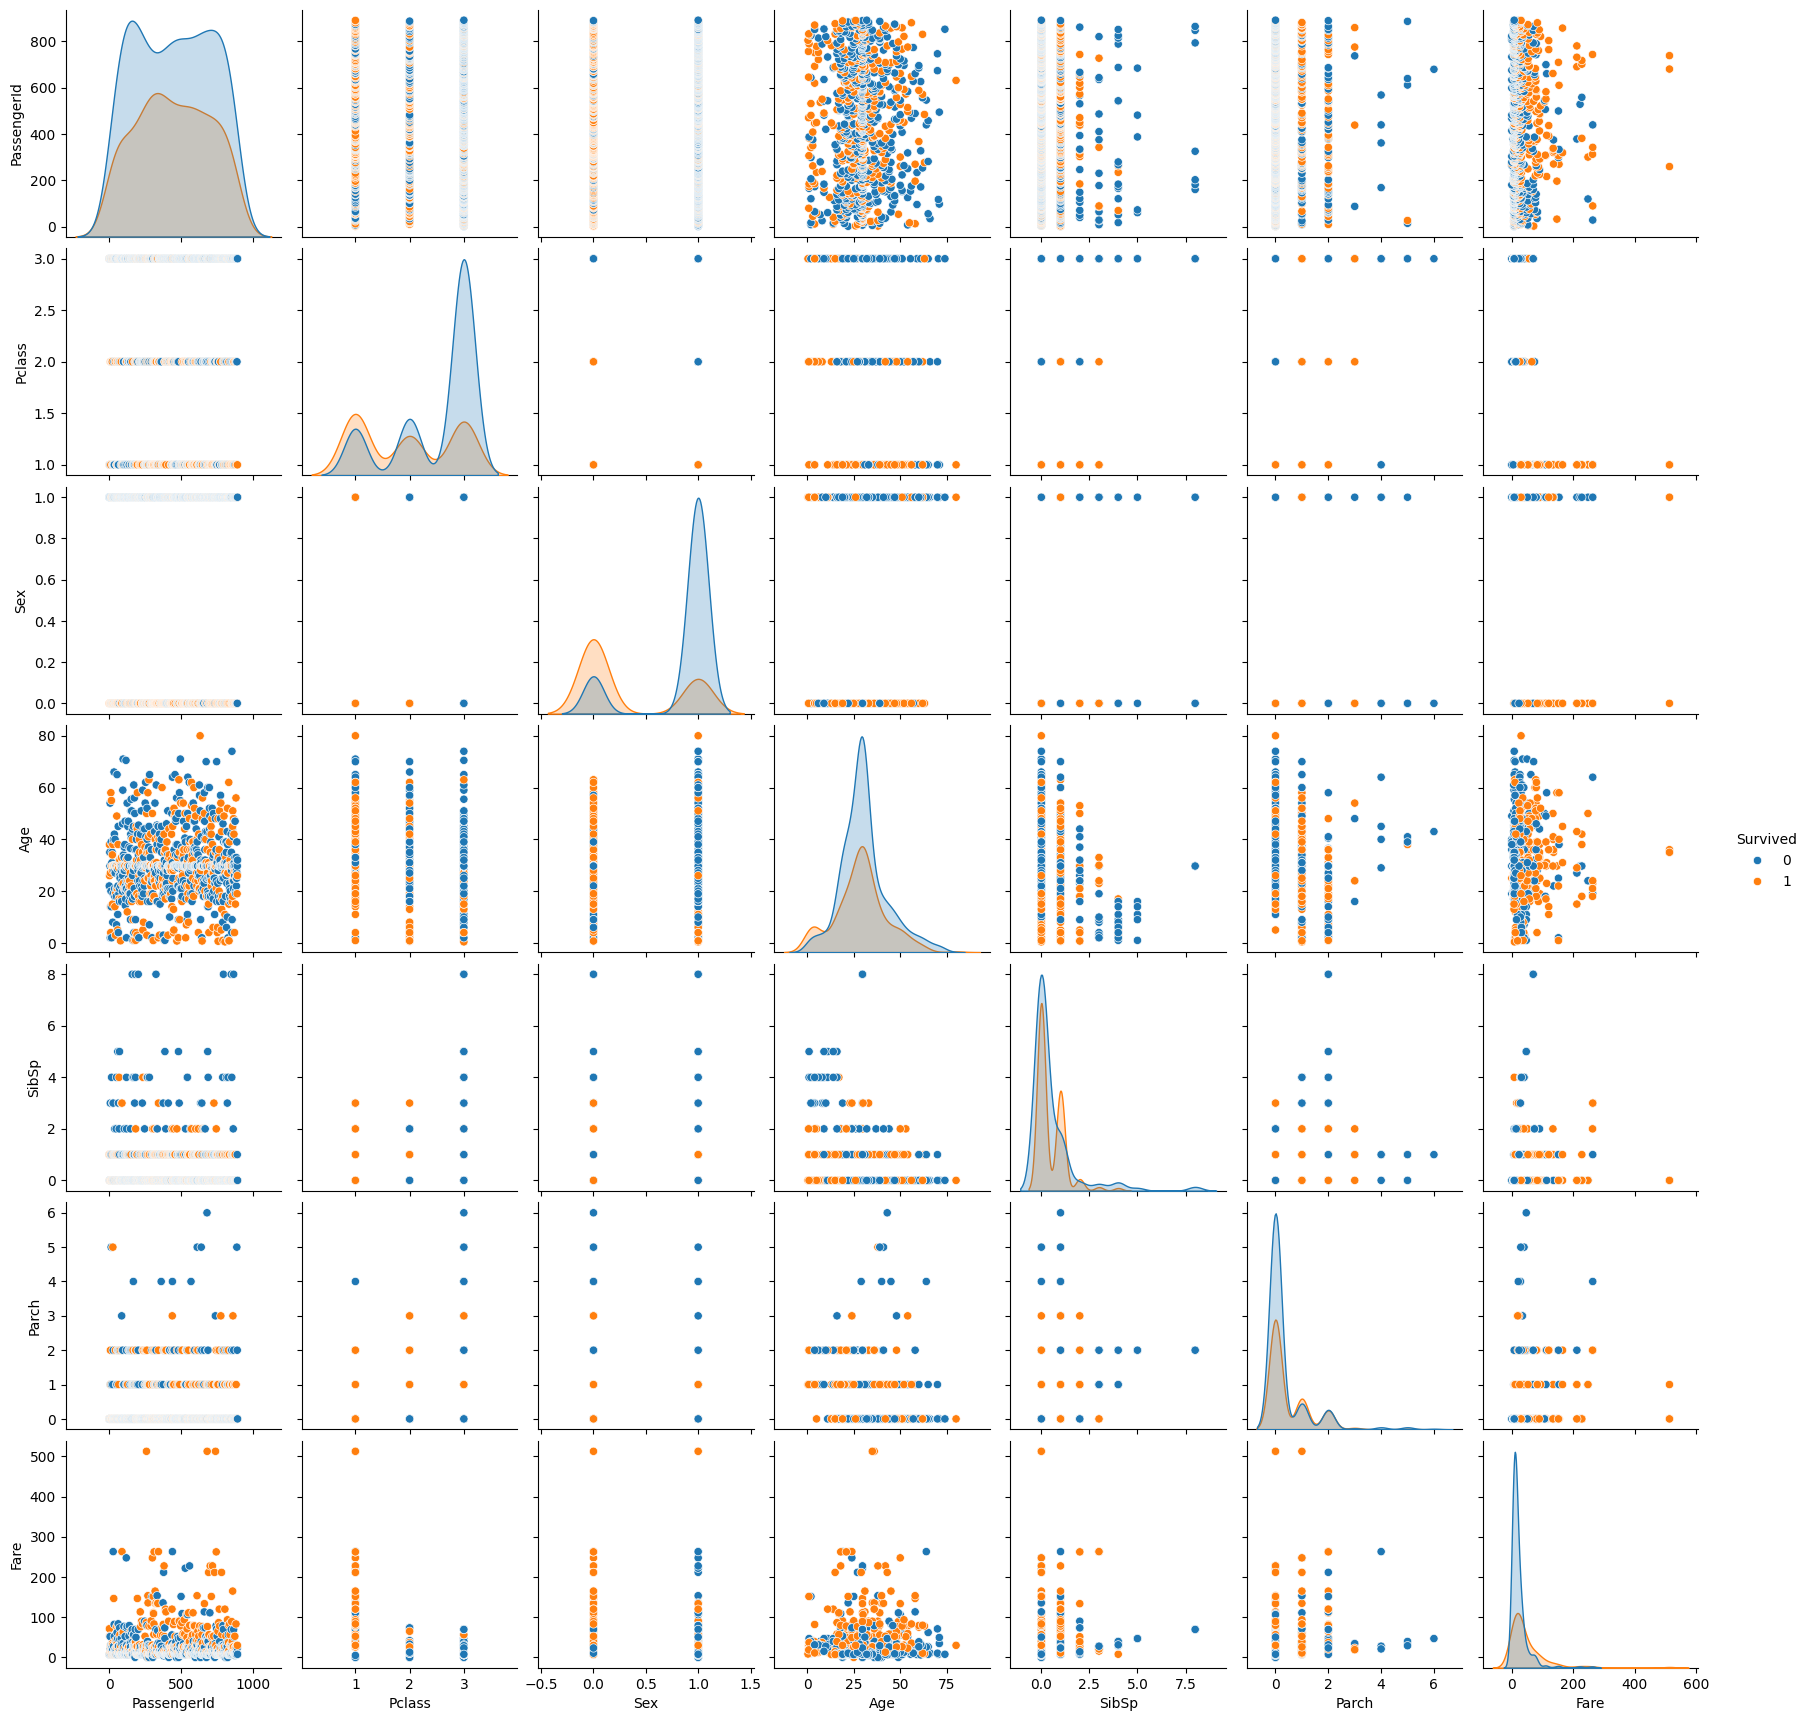

In [19]:
sns.pairplot(data=dataset, hue='Survived')
plt.show()


In [20]:
dataset.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
dataset.shape

(891, 12)

C:\Users\it solution\AppData\Local\Temp\ipykernel_10172\2641701681.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col_to_encode])


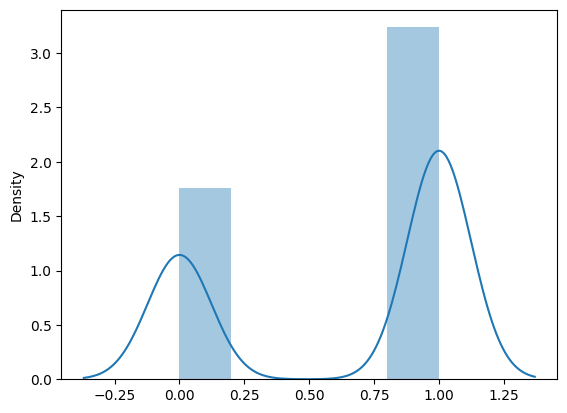

In [22]:
sns.distplot(dataset[col_to_encode])
plt.show()

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
ms=MinMaxScaler()
ms.fit(dataset[col_to_encode])

MinMaxScaler()

In [25]:
dataset[col_to_encode]=ms.transform(dataset[col_to_encode])

C:\Users\it solution\AppData\Local\Temp\ipykernel_10172\2641701681.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col_to_encode])


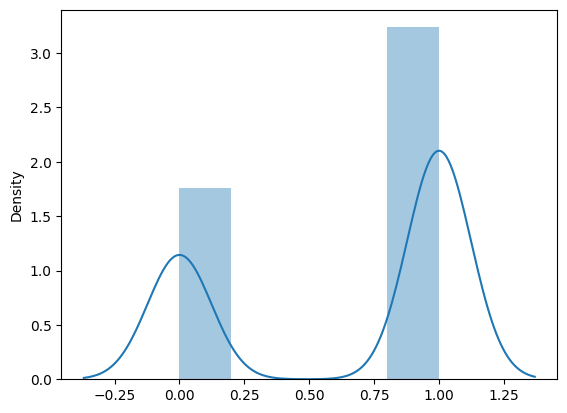

In [26]:
sns.distplot(dataset[col_to_encode])
plt.show()

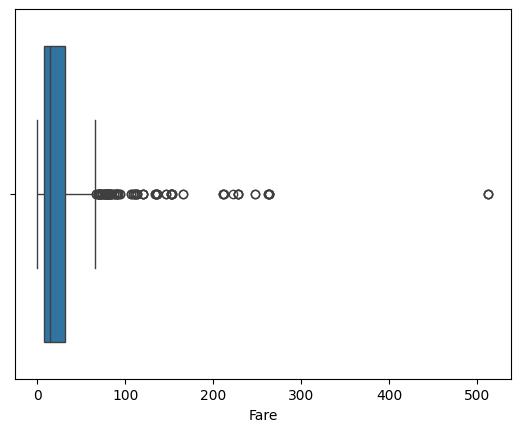

In [27]:
sns.boxplot(x='Fare', data=dataset)
plt.show()

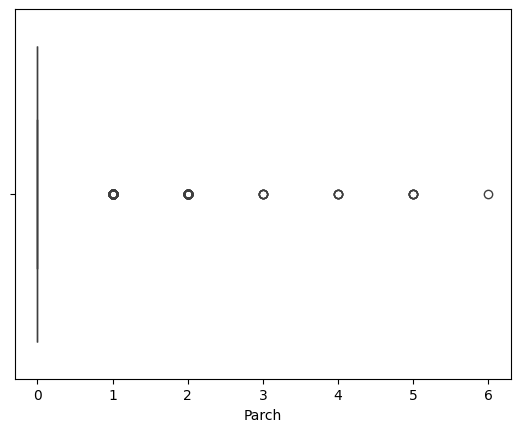

In [28]:
sns.boxplot(x='Parch', data=dataset)
plt.show()

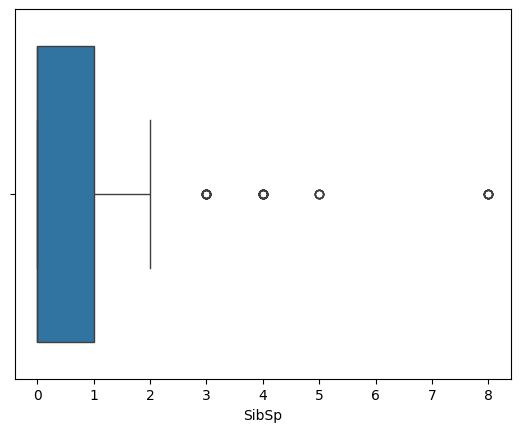

In [29]:
sns.boxplot(x='SibSp', data=dataset)
plt.show()

In [30]:
# sns.distplot(dataset['Sex'])
plt.show()

In [31]:
Col_want_remove_outliers=['Fare', 'Parch', 'SibSp']

In [32]:
q1=dataset[Col_want_remove_outliers].quantile(0.25)
q3=dataset[Col_want_remove_outliers].quantile(0.75)

In [33]:
iqr=q3-q1
iqr

Fare     23.0896
Parch     0.0000
SibSp     1.0000
dtype: float64

In [34]:
min_range=q1-(1.5*iqr)
max_range=q3+(1.5*iqr)
min_range, max_range

(Fare    -26.724
 Parch     0.000
 SibSp    -1.500
 dtype: float64,
 Fare     65.6344
 Parch     0.0000
 SibSp     2.5000
 dtype: float64)

In [36]:
dataset=dataset[dataset[Col_want_remove_outliers]<=max_range]

In [37]:
dataset.shape

(891, 12)

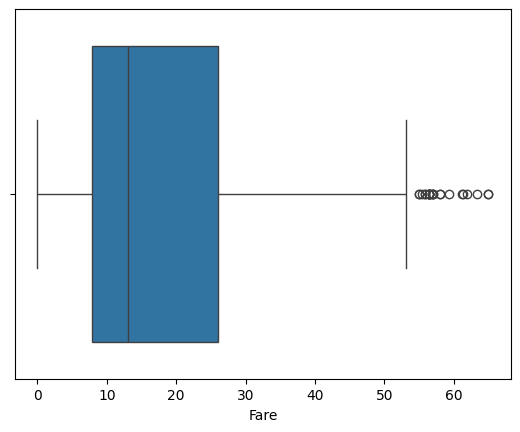

In [38]:
sns.boxplot(x='Fare', data=dataset)
plt.show()

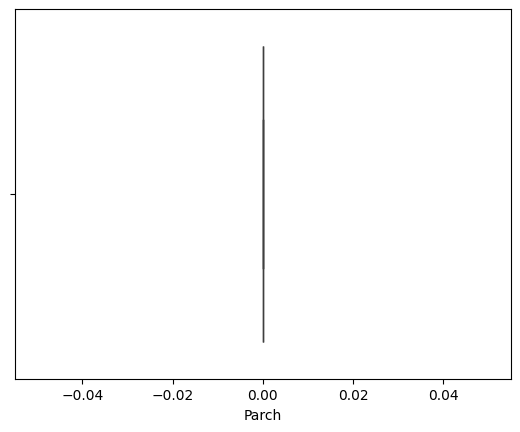

In [39]:
sns.boxplot(x='Parch', data=dataset)
plt.show()

In [40]:
# sns.boxplot(x='SibSp', data=dataset)
plt.show()

# OutLier Removal Thorugh Z Score

In [41]:
min_range=dataset[Col_want_remove_outliers].mean()-(3*dataset[Col_want_remove_outliers].std())
max_range=dataset[Col_want_remove_outliers].mean()+(3*dataset[Col_want_remove_outliers].std())
min_range, max_range

In [42]:
dataset=dataset[dataset[Col_want_remove_outliers]<=max_range]
# 

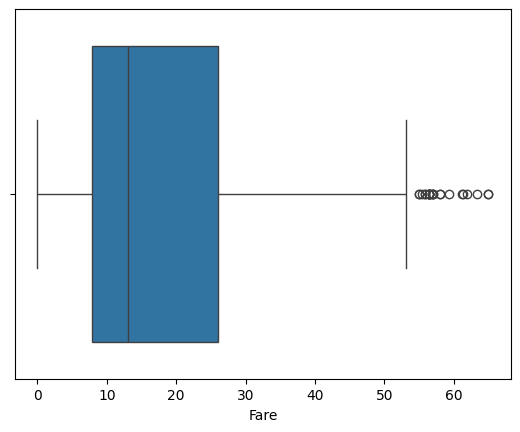

In [43]:
sns.boxplot(x='Fare', data=dataset)
plt.show()

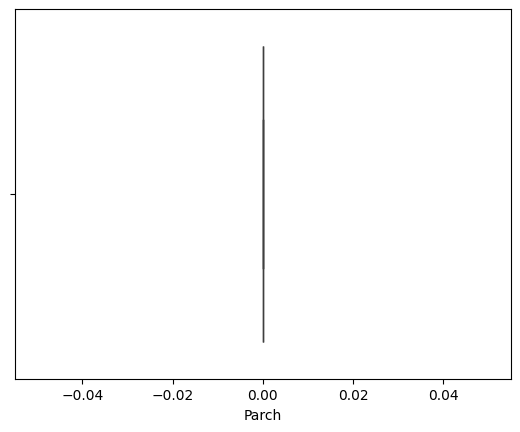

In [44]:
sns.boxplot(x='Parch', data=dataset)
plt.show()

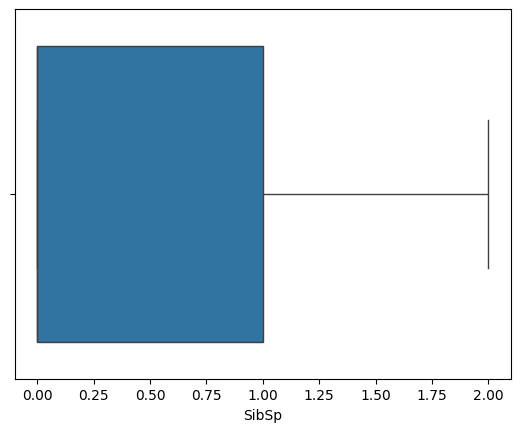

In [45]:
sns.boxplot(x='SibSp', data=dataset)
plt.show()

In [46]:
# z_score=(dataset[Col_want_remove_outliers]-dataset[Col_want_remove_outliers].mean())/(dataset[Col_want_remove_outliers].std())

In [52]:
# dataset[Col_want_remove_outliers]=z_score

In [53]:
# dataset[dataset[Col_want_remove_outliers]<3].shape

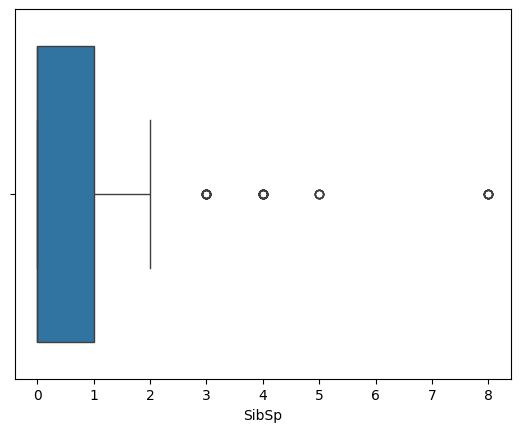

In [54]:
sns.boxplot(x='SibSp', data=dataset)
plt.show()

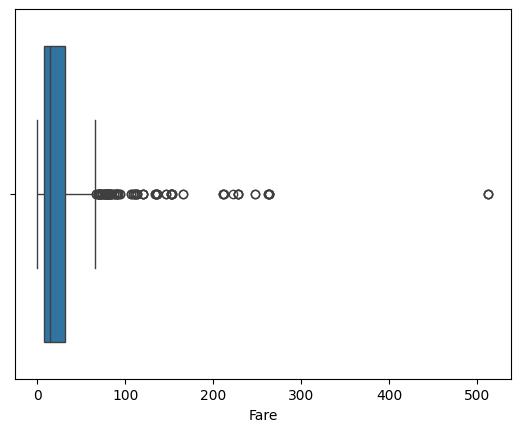

In [55]:
sns.boxplot(x='Fare', data=dataset)
plt.show()

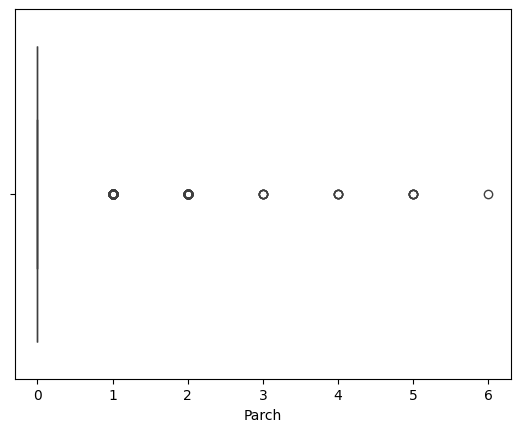

In [56]:
sns.boxplot(x='Parch', data=dataset)
plt.show()

# StandardScaller

In [57]:
x=dataset[['PassengerId','Pclass', 'Sex', 'Age', 'SibSp','Parch','Fare']]
y=dataset['Survived']

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, random_state=42)

In [60]:
from sklearn.svm import SVC

In [61]:
sv=SVC()
sv.fit(x_train, y_train)

SVC()

In [62]:
sv.score(x_test, y_test), sv.score(x_train, y_train)

(0.6188340807174888, 0.655688622754491)

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
dt=DecisionTreeClassifier(max_depth=4)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [65]:
dt.score(x_test, y_test), dt.score(x_train, y_train)

(0.8071748878923767, 0.8398203592814372)

In [66]:
from sklearn.naive_bayes import GaussianNB

In [67]:
gnb=GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [68]:
gnb.score(x_test, y_test), gnb.score(x_train, y_train)

(0.7802690582959642, 0.7964071856287425)

In [69]:
from sklearn.ensemble import VotingClassifier

In [70]:
li=[('sv', SVC()), ('dt', DecisionTreeClassifier()), ('gnb', GaussianNB())]

In [71]:
vc=VotingClassifier(li,  weights=[0, 0, 3])
vc.fit(x_train, y_train)

VotingClassifier(estimators=[('sv', SVC()), ('dt', DecisionTreeClassifier()),
                             ('gnb', GaussianNB())],
                 weights=[0, 0, 3])

In [72]:
vc.score(x_test, y_test), vc.score(x_train, y_train)

(0.7802690582959642, 0.7964071856287425)

In [73]:
prd={'svm':sv.predict(x_test), 'dt': dt.predict(x_test), 'gnb':gnb.predict(x_test), 'vc':vc.predict(x_test)}

In [74]:
pd.DataFrame(prd).head(50)

,svm,dt,gnb,vc
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,1,1,1
4,0,1,1,1
5,0,1,1,1
6,0,1,1,1
7,0,0,0,0
8,0,1,1,1
9,0,1,1,1


###### 